In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
data=pd.read_csv("Fraud.csv")
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [3]:
#checking for null Values
data.isnull().sum() #It has no null/missing values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [4]:
#Detecting and removing outliers
# describe some statistic
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


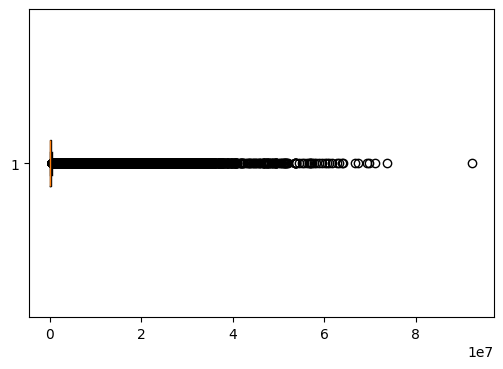

In [5]:
plt.figure(figsize=(6, 4))
plt.boxplot(data['amount'], vert=False)
plt.show()

In [6]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [7]:
#correlation of the variables
data.corr(numeric_only = True)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<Axes: >

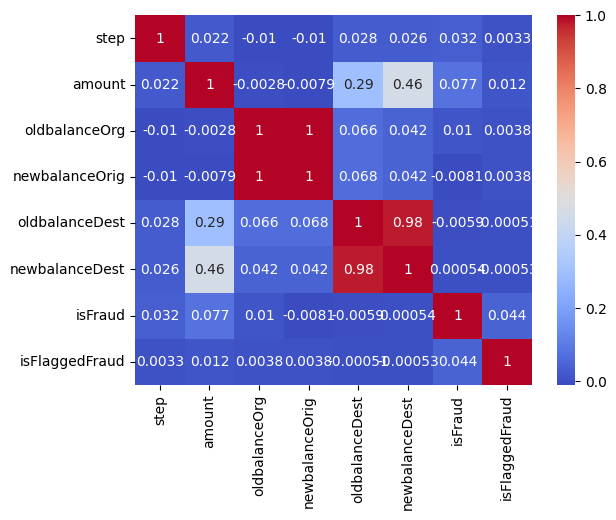

In [8]:
sns.heatmap(data.corr(numeric_only = True),cmap='coolwarm',annot =True)

In [9]:
# frequency of target value
data.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

<Axes: xlabel='isFraud'>

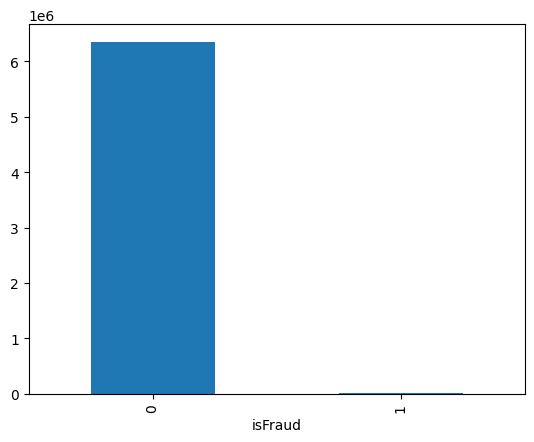

In [10]:
data.isFraud.value_counts().plot(kind ='bar')

In [11]:
data[data.isFraud ==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [12]:
data[data.isFlaggedFraud ==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [13]:
# feature engineering add new feature to the dataframe which will show the transaction is fraud if amount is >=200000
data['above200000'] = data['amount'] >= 200000.00
data['above200000'] = data.above200000.map({False:0,True:1})

In [14]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,above200000
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,1


<Axes: >

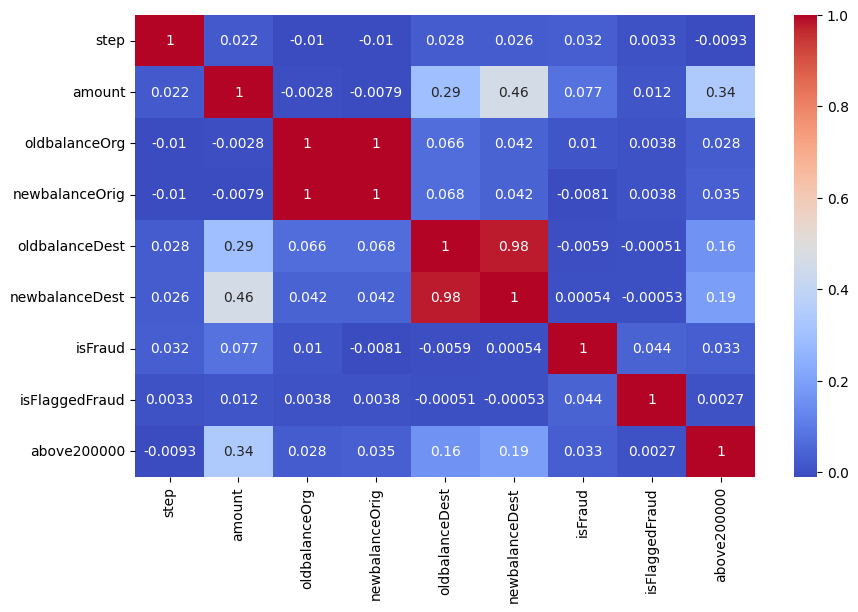

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only = True),cmap='coolwarm',annot =True,)

In [16]:
from sklearn.metrics.cluster import mutual_info_score
mutual_info_score(data.type,data.isFraud)

0.0013803993713611398

In [17]:
mutual_info_score(data.step,data.isFraud)

0.004688730892802933

In [18]:
## array([0.00424042, 0.00314766, 0.00286972, 0.00131861, 0.00095569,0.00109025, 0])

In [19]:
#so we have to remove least information value 'Features'
#create new dataframe for training and drop unnecessary features
x_train = data.drop(columns=['step','type','nameOrig','nameDest','isFlaggedFraud','isFraud'])

In [20]:
data.amount.max()

92445516.64

In [21]:
data.amount.mean()

179861.90354913071

In [22]:
data.amount.std()

603858.2314629358

<Axes: ylabel='Density'>

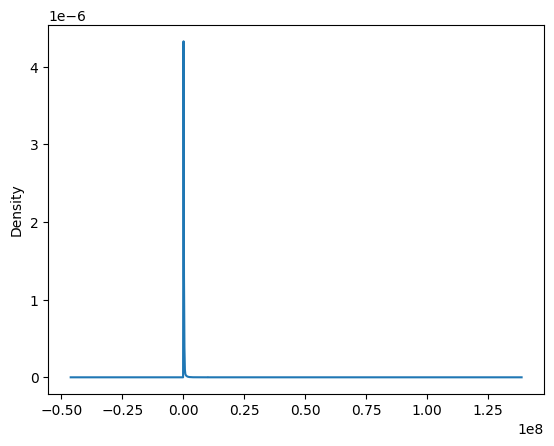

In [23]:
data.amount.plot.kde()

In [24]:
# the data does't follow n-dist so we can use normalization instead of standadization
# normalize
df_norm = pd.DataFrame(columns=[x_train.columns])

In [25]:
df_norm['amount'] = (data['amount'] - data['amount'].min()) / (data['amount'].max() -data['amount'].min())

In [26]:
df_norm['oldbalanceOrg'] = (data['oldbalanceOrg'] - data['oldbalanceOrg'].min()) / (data['oldbalanceOrg'].max() -data['oldbalanceOrg'].min())
df_norm['newbalanceOrig'] = (data['newbalanceOrig'] - data['newbalanceOrig'].min()) / (data['newbalanceOrig'].max() -data['newbalanceOrig'].min())
df_norm['oldbalanceDest'] = (data['oldbalanceDest'] - data['oldbalanceDest'].min()) / (data['oldbalanceDest'].max() -data['oldbalanceDest'].min())
df_norm['newbalanceDest'] = (data['newbalanceDest'] - data['newbalanceDest'].min()) / (data['newbalanceDest'].max() -data['newbalanceDest'].min())

In [27]:
df_norm['above200000'] = data.above200000

In [28]:
# new dataframe , it is scaled
df_norm

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,above200000
0,0.000106,0.002855,0.003233,0.000000,0.000000,0
1,0.000020,0.000357,0.000391,0.000000,0.000000,0
2,0.000002,0.000003,0.000000,0.000000,0.000000,0
3,0.000002,0.000003,0.000000,0.000059,0.000000,0
4,0.000126,0.000697,0.000603,0.000000,0.000000,0
...,...,...,...,...,...,...
6362615,0.003674,0.005701,0.000000,0.000000,0.000954,1
6362616,0.068272,0.105923,0.000000,0.000000,0.000000,1
6362617,0.068272,0.105923,0.000000,0.000192,0.017912,1
6362618,0.009195,0.014265,0.000000,0.000000,0.000000,1


In [29]:
# split the data for training and validation
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test  = train_test_split(df_norm, data.isFraud,test_size=0.2)

In [30]:
Y_train.shape

(5090096,)

In [31]:
X_test.shape

(1272524, 6)

## Model Using RandomForestClassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, Y_train)

RandomForestClassifier()

In [33]:
classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [34]:
pred = classifier.predict(X_test)

In [35]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,classification_report,precision_score,recall_score

In [37]:
confusion_matrix(Y_test,pred)

array([[1270818,      51],
       [    533,    1122]], dtype=int64)

In [38]:
accuracy_score(Y_test,pred)

0.9995410695593954

In [39]:
from sklearn import metrics
#Training_acuuracy
y_train_pred=classifier.predict(X_train)
metrics.accuracy_score(Y_train,y_train_pred)

0.9997432268468021

In [40]:
precision_score(Y_test,pred)

0.9565217391304348

In [41]:
recall_score(Y_test,pred)

0.6779456193353475

In [42]:
f1_score(Y_test,pred)

0.7934936350777935

In [43]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270869
           1       0.96      0.68      0.79      1655

    accuracy                           1.00   1272524
   macro avg       0.98      0.84      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524



## Model using GradientBoostingClassifier

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
classifier2 = GradientBoostingClassifier()
classifier2.fit(X_train, Y_train)
pred2 = classifier2.predict(X_test)

In [45]:
pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
#test accuracy
accuracy_score(Y_test,pred2)

0.9987175094536528

In [47]:
# Hyperparameter tunning To increase Model1 potential
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
     

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],#Max trees
    'max_depth': [10, 20] #each tree depth
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit model
grid_search.fit(X_train, Y_train)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'n_estimators': [100, 200]},
             verbose=2)

In [48]:
from sklearn.metrics import roc_auc_score, confusion_matrix

# Get predicted probabilities for fraud
y_pred_proba = classifier.predict_proba(X_test)[:,1]

# Find optimal threshold using roc_auc_score
threshold = 0
best_score = 0
for i in np.arange(0,1,0.05):
    y_pred_val = y_pred_proba > i
    score = roc_auc_score(Y_test, y_pred_val)
    if score > best_score:
        best_score = score
        threshold = i

# Use the optimal threshold to make predictions
y_pred = y_pred_proba > threshold

# Get Increased the recall score
recall = recall_score(Y_test, y_pred)
print("Recall: ", recall)

# Lets Get new  confusion matrix
conf_mat = confusion_matrix(Y_test, y_pred)
print("Confusion matrix: \n", conf_mat)

Recall:  0.8362537764350453
Confusion matrix: 
 [[1269923     946]
 [    271    1384]]


In [49]:
print(classification_report(Y_test, y_pred));

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270869
           1       0.59      0.84      0.69      1655

    accuracy                           1.00   1272524
   macro avg       0.80      0.92      0.85   1272524
weighted avg       1.00      1.00      1.00   1272524



## Answers Regarding the Questions of Assessment:
->For data cleaning, I would first check for missing values and remove any rows with missing- values. I would then check for outliers in the amount column and remove any extreme values that do not fall within a certain range. I would also check for multi-collinearity among the variables and remove any highly correlated variables.

->I would use a supervised machine learning model, such as Random Forest or GB classifier, to classify transactions as fraudulent or non-fraudulent. I would also use feature engineering to create new variables that may be useful in detecting fraud, such as the ratio of the transaction amount to the initial balance or amount threshold.

->I would select variables to be included in the model based on their correlation with the target variable (isFraud) and their importance in detecting fraud. Variables such as amount, the initial and final balances of both the customer and the recipient would be important for the model.

->I would use metrics such as precision, recall, F1 score, accuracy to evaluate the performance of the model. I would also use cross-validation to ensure that the model is not overfitting to the training data.

->The key factors that predict fraudulent customers would likely include high transaction amounts, sudden changes in account balances, and transactions involving multiple parties.

->These factors make sense as they are indicative of suspicious or unusual activity that may be indicative of fraud. High transaction amounts and sudden changes in account balances may be indicative of an attempt to steal funds, while transactions involving multiple parties may be indicative of money laundering or other illegal activities.

->To prevent fraud, the company could implement measures such as transaction monitoring, account monitoring, and two-factor authentication. Additionally, the company could also train its employees to identify and report suspicious activity.

->To determine if these actions are effective, the company could track the number of fraudulent transactions before and after the implementation of these measures. Additionally, the company could also conduct regular audits and assessments to identify any areas where the system may be vulnerable to fraud.


